In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

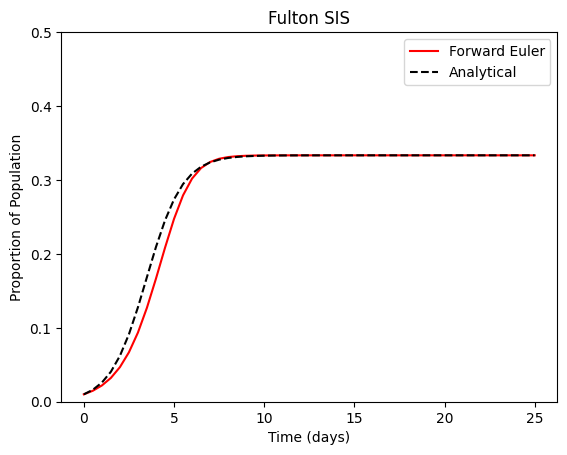

'\n# Calculate the error between FE and Analytical for given timestep (n +1 measurements)\n\nerror = abs(infected - theory(ts))\nmaxerror = max(error)\nmaxerror\n'

In [63]:
# Set duration grid (in days)
step = 0.5 # stepsize
t0 = 0 #initial time
tf = 25 #final time
n = int(np.ceil((tf-t0)/step)) #number of data points
ts = np.linspace(t0,tf,n+1)
step = ts[1]-ts[0]

# Introduce constraints
N = 1  #total population - in normalized system set to 1 (percentages)
I0 = 0.01 #initial infected
S0 = N - I0 #initial susceptible

# Introduce parameters
beta = 3.0
gamma = 2.0

# Set initial conditions

y = np.zeros((len(ts),2))
y[0] = S0, I0

# Analytical Solution
r0 = beta / gamma
K = 1 - (1/r0)

def theory(ts):
    return K/(1 + ((K-I0)/I0)*np.exp(-(beta-gamma)*ts))


# SIS Model
def model(y,t,N,beta,gamma):
    S, I = y
    dSdt = -beta * S * I + gamma * I
    dIdt = beta * S * I - gamma * I
    return np.array([dSdt, dIdt])

for i, t in enumerate(ts[:-1]):
    y[i+1] = y[i] + step*model(y[i], t, N ,beta, gamma)
    
infected = y[:,1]

# Plot the FE and Analytical approx

plt.plot(ts,infected, color = 'red')
plt.plot(ts,theory(ts),color = 'black', linestyle='dashed')
plt.ylim(0,0.5)
plt.title('Fulton SIS')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.legend(['Forward Euler', 'Analytical'])
plt.show()


"""
# Calculate the error between FE and Analytical for given timestep (n +1 measurements)

error = abs(infected - theory(ts))
maxerror = max(error)
maxerror
"""

In [ ]:
#Vals for ref when making table (this is the super lazy/slow way of going about this tbh...)
# 2.0 -> 0.118136824867308
# 1.0 -> 0.08077107437456943
# 0.5 -> 0.04283504637204699
# 0.25 -> 0.02199772042578746
# 0.0125 -> 0.001119446782795297
# 0.00625 -> 0.0005599050455105392
# 0.003125 -> 0.0002799973926034538

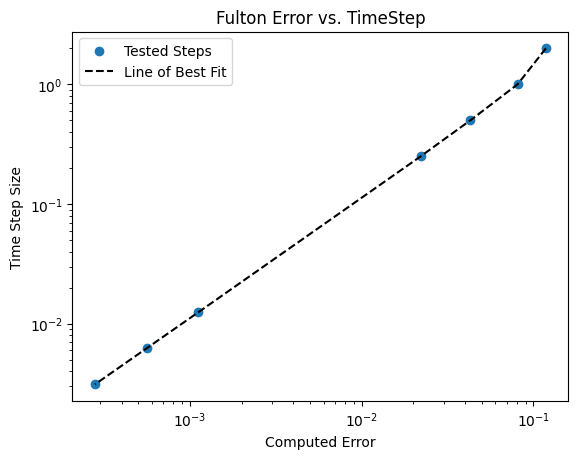

In [60]:
# Plot error for stepsizes 2, 1, 0.5, 0.25, 0.0125, 0.00625, 0.003125

# Create np.array with specific values
errperstep = np.array([[2.0,0.118136824867308],[1.0,0.08077107437456943],[0.5,0.04283504637204699],[0.25,0.02199772042578746],[0.0125,0.001119446782795297], [0.00625,0.0005599050455105392], [0.003125,0.0002799973926034538]])
stepvals = errperstep[:,0]
errvals = errperstep[:,1]

# Create plot
plt.scatter(errvals,stepvals)
plt.xscale('log')
plt.yscale('log')
plt.loglog(errvals,stepvals,color = 'black', linestyle='dashed')
plt.title('Fulton Error vs. TimeStep')
plt.xlabel('Computed Error')
plt.ylabel('Time Step Size')
plt.legend(['Tested Steps', 'Line of Best Fit'])
plt.show()